In [1]:
import sys
import os
from os.path import isfile, join
import re
sys.path.append("/home/jemonet/Documents/These/Code/Graphes")
sys.path.append("/user/jemonet/home/Documents/These/stimuli")
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from figure_lib.src.data_transform.GraphDF import GraphDF
# from figure_lib.src.make_figure.figure import Figure
import seaborn as sns
import matplotlib as mpl

import figure_lib.src.data_transform.GraphDF as gdf
import figure_lib.src.data_transform.listMatrix2D as lm2D
import figure_lib.src.make_figure.figure as fg
import figure_lib.src.make_figure.graphFigure as gfg
import figure_lib.src.make_figure.heatmapFigure as hmf
import stim_help_functions as hf


#%matplotlib qt
%matplotlib inline

In [58]:
path = "/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_white_bar_flash/(current) corrections_retinocortical_branch/Retinocortical/all_cells_noGC_noAma_noSurr_extdrive0,002_Lexc10.csv"

df = gdf.GraphDF(path,0.00878,60,20,20)

df_exc = df.isolate_dataframe_byoutputs("v_e")
df_inh = df.isolate_dataframe_byoutputs("v_i")

In [106]:
m = df_exc.data.max().max()
df_exc.data.max().idxmax()
df_exc.data.loc[:,"v_e (1389) CorticalExcitatory"].idxmax()

0.057526560000000004

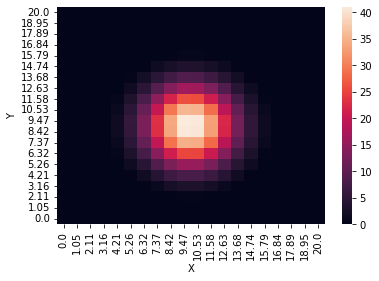

In [59]:
data_t = df_inh.data.iloc[399]

x = [round(i,2) for i in np.linspace(20,0,20)]
y = [round(i,2) for i in np.linspace(0,20,20)]

new_df = pd.DataFrame(0,index=x, columns=y)
new_df.index.name = "Y"
new_df.columns.name = "X"

for x in range(20):
    for y in range(20):
        new_df.iloc[19-y,x] = data_t.iloc[20*x + y]

plot = sns.heatmap(new_df)
fig = plot.get_figure()

In [68]:
(new_df.max().max()*np.exp(-1)-10)/np.sqrt(2)

3.611874940320273

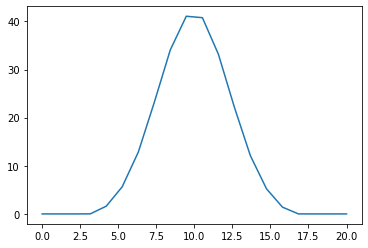

In [61]:
plt.plot(new_df.iloc[10])
#f = lambda dist_sqr, sigma: (np.exp(-1.0 * dist_sqr / (2.0 * sigma*sigma)) / (1-np.exp(-(25*sigma*sigma)/2.0))*(2. * np.pi * sigma*sigma))

In [5]:
importlib.reload(gdf)
importlib.reload(fg)
importlib.reload(gfg)

path = "/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_white_bar_flash/(current) corrections_retinocortical_branch/Cortex/noStimRetInh/tau"
path01ms = f"{path}/one_cell_noGC_noAma_noSurr_extdrive0,002_tau0,001.csv"
path5ms = f"{path}/one_cell_noGC_noAma_noSurr_extdrive0,002_tau0,005.csv"
path10ms = f"{path}/one_cell_noGC_noAma_noSurr_extdrive0,002_tau0,010.csv"
path15ms = f"{path}/one_cell_noGC_noAma_noSurr_extdrive0,002_tau0,015.csv"
path20ms = f"{path}/one_cell_noGC_noAma_noSurr_extdrive0,002_tau0,020.csv"

for i in range(5):
    path = [path01ms,path5ms,path10ms,path15ms,path20ms][i]
    tau = ["0,1ms","5ms","10ms","15ms","20ms"][i]
    
    df = gdf.GraphDF(path,0.00878,60,20,20)
    df_exc = df.isolate_dataframe_byoutputs("v_e")
    df_inh = df.isolate_dataframe_byoutputs("v_i")
    
    if i>1:
        df_exc = df_exc.isolate_dataframe_columns_bynum("1390")
        df_inh = df_inh.isolate_dataframe_columns_bynum("1790")
    df_exc.data = df_exc.data.iloc[0:1117,:]
    df_inh.data = df_inh.data.iloc[0:1117,:]
    #Crop
    #df_exc.list_col[0].cell.type = f"tau {tau}"
    df_exc.data = df_exc.data.rename(columns={"v_e (1390) CorticalExcitatory":f"v_e (1390) CorticalExcitatory tau {tau}"})
    #df_inh.list_col[0].cell.type = f"tau {tau}"
    df_inh.data = df_inh.data.rename(columns={"v_i (1790) CorticalInhibitory":f"v_i (1790) CorticalInhibitory tau {tau}"})

    if i==0:       
        df_merge_exc = df_exc
        df_merge_inh = df_inh
    else:
        df_merge_exc = df_merge_exc + df_exc
        df_merge_inh = df_merge_inh + df_inh



-- Default values taken for figure parameters --


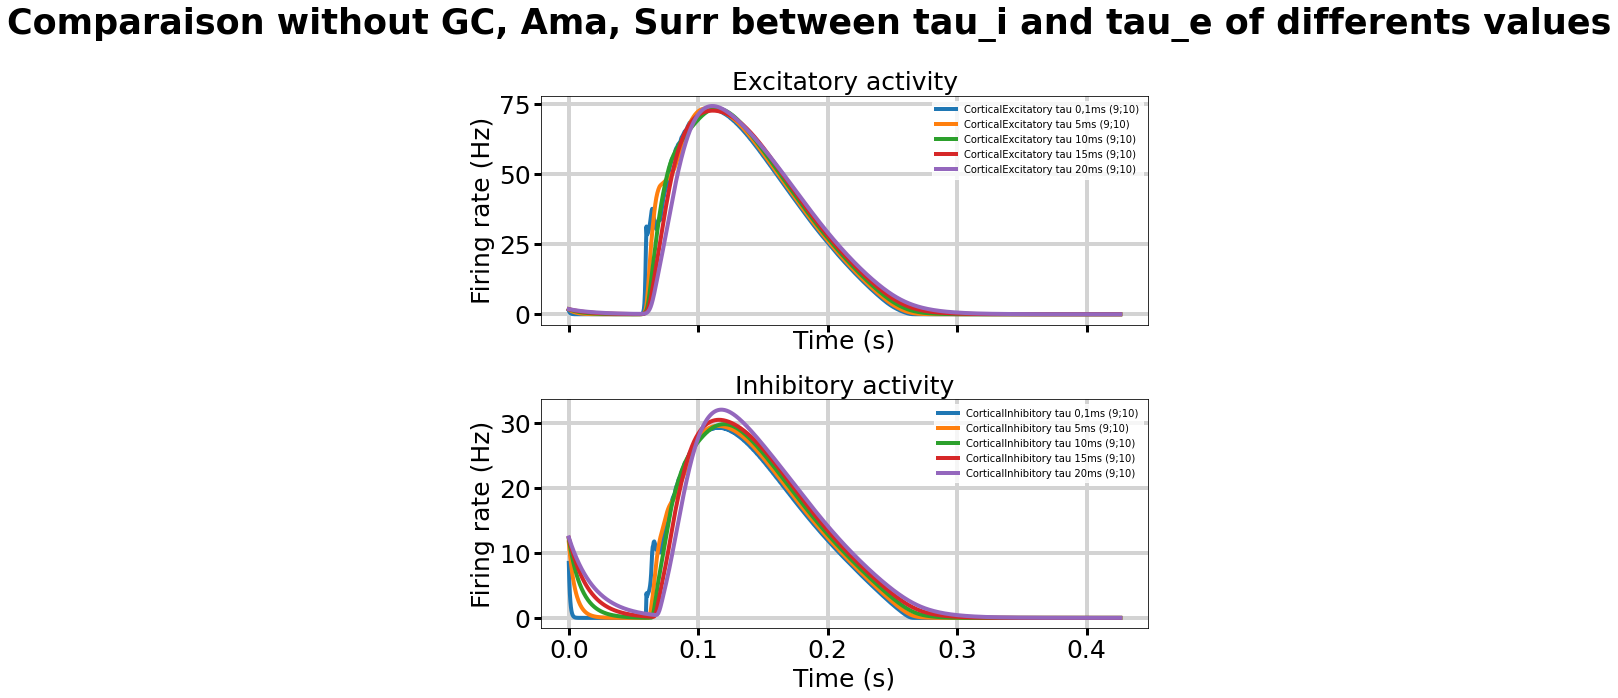

In [6]:
list_df = [df_merge_exc,df_merge_inh]

params_fig = dict(wspace=0.5,hspace=0.4,height_ratios=[1,1],width_ratios=[1,1])

info_fig = {"title":"Comparaison without GC, Ama, Surr between tau_i and tau_e of differents values","subtitles":["Excitatory activity","Inhibitory activity"],"xlabel":"Time (s)","ylabel":["Firing rate (Hz)","Firing rate (Hz)"],
"sharex":True,"sharey":False}

font_size = {"main_title":35, "subtitle":25, "xlabel":25, "ylabel":25, "g_xticklabel":25, "g_yticklabel":25, "legend":10}

params_plot = {"grid_color":"lightgray","grid_width":4,"ticklength":7,"tickwidth":3}


f = gfg.graphFigure(list_df,2,1, dict_info_fig=info_fig, dict_font_size=font_size,dict_params_plot=params_plot)
#f.set_figure_legend((1,2), fontsize=10)
plt.tight_layout()

In [3]:
importlib.reload(gdf)
importlib.reload(lm2D)


list2Dmatrix, list_t,max_value = df_toplot.export_rows_to_2DmatrixList()
mat2D = lm2D.listMatrix2D(list2Dmatrix, max_value, list_t)
mat2D_red = lm2D.listMatrix2D([list2Dmatrix[0]], max_value, [list_t[0]])


In [78]:
importlib.reload(lm2D)


mat2D = lm2D.listMatrix2D(list2Dmatrix, max_value, list_t)
mat2D_red2 = lm2D.listMatrix2D(list2Dmatrix[0:2], max_value, list_t[0:2])
mat2D_red = lm2D.listMatrix2D([list2Dmatrix[1]], max_value, [list_t[1]])
mat2D_red

---------------------------------------------

### Parameters :
 - t = 0.0004 --> 0.0004
 - dim = 1 heatmap of (20, 20)
 - max = 4.27693


KeyboardInterrupt: 

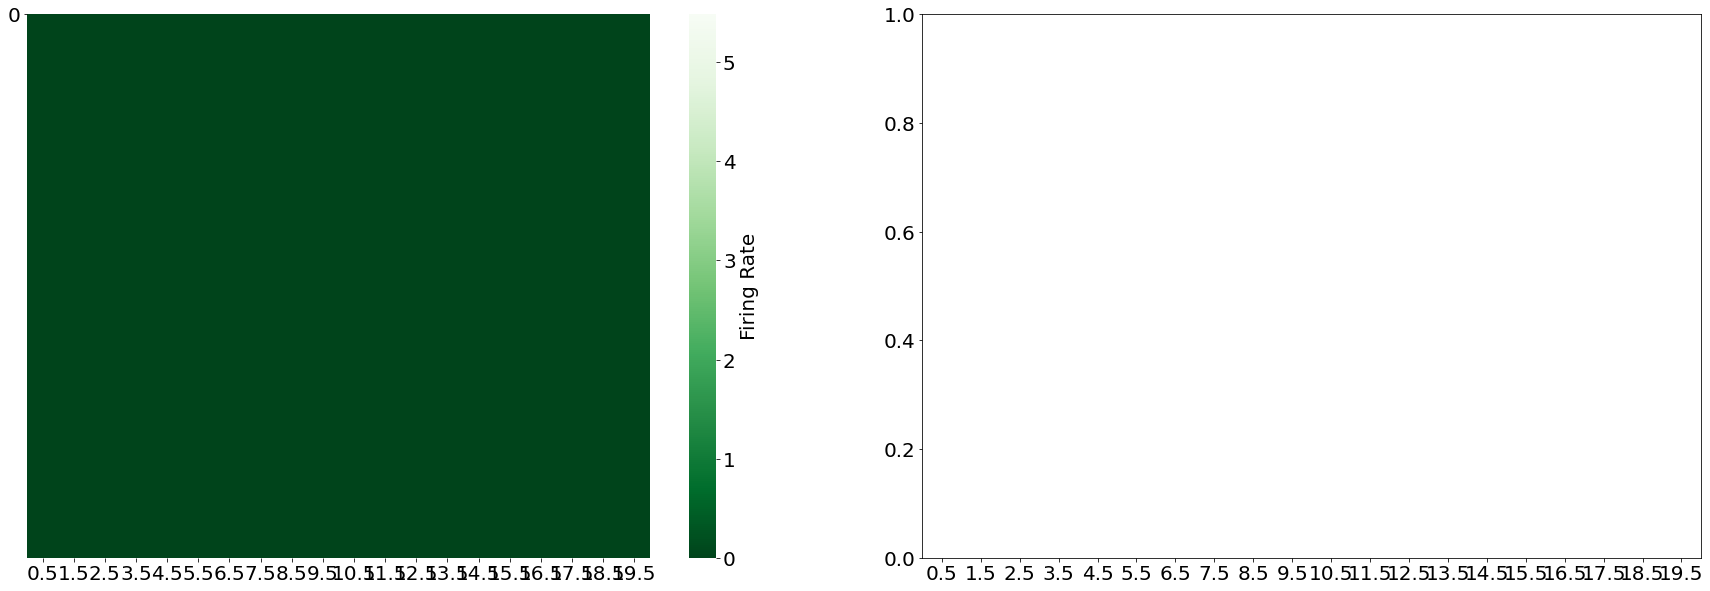

In [56]:
importlib.reload(hmf)
importlib.reload(gdf)
importlib.reload(lm2D)

path_load = "/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_white_bar_flash/(current) corrections_retinocortical_branch/Cortex/StimRetInh_3sigma_BiaisedCortConnec/all_cells_noGC_noAma_noSurr_extdrive0,002_VC300_8f.csv"
path_save = "/user/jemonet/home/Documents/These/Code/Graphes/figure_lib/data_tests/matrix_VC300"

#n_frame = int(re.search(r"[0-9]f",file)[0][0])
n_frame = 8
df = gdf.GraphDF(path_load,0.00878,60,20,20)
df = df.crop(df.dt*n_frame)

df_exc = df.isolate_dataframe_byoutputs("v_e")
df_inh = df.isolate_dataframe_byoutputs("v_i")

list_2Dm, list_t , min_value, max_value = df_exc.export_rows_to_2DmatrixList()
mat2D_exc = lm2D.listMatrix2D(list_2Dm, list_t , min_value, max_value)
list_2Dm, list_t , min_value, max_value = df_inh.export_rows_to_2DmatrixList()
mat2D_inh = lm2D.listMatrix2D(list_2Dm, list_t , min_value, max_value)

params_fig = dict(wspace=0.15,hspace=0.4)

info_fig = {"title":"Heatmap des activités v_e et v_i pour les conditions par défaut","subtitles":["Excitatory activity","Inhibitory activity"],"xlabel":"X coordinate (mm)","ylabel":"Y coordinate (mm)",
"sharex":True,"sharey":False}

font_size = {"main_title":35, "subtitle":25, "xlabel":25, "ylabel":25, "g_xticklabel":15, "g_yticklabel":15, "legend":10, "global":20}

params_plot = {"grid_color":"lightgray","grid_width":4,"ticklength":5,"tickwidth":3, "labelpad":15, "col_map":["Greens_r","Reds_r"]}

f = hmf.heatMapFigure([mat2D_exc, mat2D_inh],dict_info_fig=info_fig, dict_font_size=font_size,dict_params_plot=params_plot, dict_params_fig=params_fig)
f.set_plot(path_save)

#Rajouter le pad des label
#Rajouter titre et labels

In [ ]:
importlib.reload(hmf)
importlib.reload(gdf)
importlib.reload(lm2D)

path_load = "/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_white_bar_flash/(current) corrections_retinocortical_branch/Cortex/StimRetInh_3sigma_BiaisedCortConnec/all_cells_noGC_noAma_noSurr_extdrive0,002_VC300_8f.csv"
path_save = "/user/jemonet/home/Documents/These/Code/Graphes/figure_lib/data_tests/matrix_VC300"

#n_frame = int(re.search(r"[0-9]f",file)[0][0])
n_frame = 8
df = gdf.GraphDF(path_load,0.00878,60,20,20)
df = df.crop(df.dt*n_frame)

df_exc = df.isolate_dataframe_bytype("CorticalExcitatory")
df_exc = df_exc.isolate_dataframe_byoutputs("muVn")
df_inh = df.isolate_dataframe_bytype("CorticalInhibitory")
df_inh = df_inh.isolate_dataframe_byoutputs("muVn")

list_2Dm, list_t , min_value, max_value = df_exc.export_rows_to_2DmatrixList()
mat2D_exc = lm2D.listMatrix2D(list_2Dm, list_t , min_value, max_value)
list_2Dm, list_t , min_value, max_value = df_inh.export_rows_to_2DmatrixList()
mat2D_inh = lm2D.listMatrix2D(list_2Dm, list_t , min_value, max_value)

params_fig = dict(wspace=0.15,hspace=0.4)

info_fig = {"title":"Heatmap des activités v_e et v_i pour les conditions par défaut","subtitles":["Excitatory activity","Inhibitory activity"],"xlabel":"X coordinate (mm)","ylabel":"Y coordinate (mm)",
"sharex":True,"sharey":False}

font_size = {"main_title":35, "subtitle":25, "xlabel":25, "ylabel":25, "g_xticklabel":15, "g_yticklabel":15, "legend":10, "global":20}

params_plot = {"grid_color":"lightgray","grid_width":4,"ticklength":5,"tickwidth":3, "labelpad":15, "col_map":["Greens_r","Reds_r"]}

f = hmf.heatMapFigure([mat2D_exc, mat2D_inh],dict_info_fig=info_fig, dict_font_size=font_size,dict_params_plot=params_plot, dict_params_fig=params_fig)
f.set_plot(path_save)

#Rajouter le pad des label
#Rajouter titre et labels

In [16]:
importlib.reload(gdf)
importlib.reload(fg)

path_dir = "/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_white_bar_flash/(current) corrections_retinocortical_branch/Cortex/StimRetInh"
files = [f for f in os.listdir(path_dir) if isfile(join(path_dir,f)) and re.search(r".*\.csv",f)!=None and re.search(r"VC[0-9]{1,3}", f) != None]
files.sort(key = lambda x : int(re.search(r"VC[0-9]{1,3}", x)[0][2:]))

for file in files:
    VC = re.search(r"VC[0-9]{1,3}",file)[0][2:]
    if VC=="300":
        n_frame = int(re.search(r"[0-9]f",file)[0][0])
        path = f"{path_dir}/all_cells_noGC_noAma_noSurr_extdrive0,002_VC{VC}_{n_frame}f.csv"
        print(path)

        df = gdf.GraphDF(path,0.00878,60,20,20)
        #df = df.crop(df.dt*n_frame)

        df_exc = df.isolate_dataframe_byoutputs("v_e")
        df_exc = df_exc.crop(df_exc.dt*n_frame)
        df_inh = df.isolate_dataframe_byoutputs("v_i")
        df_inh = df_inh.crop(df_inh.dt*n_frame)

        df_toplot = df_exc

        for i in range(df_toplot.data.shape[0]):
            data_t = df_toplot.data.iloc[i]
            time = round(df_toplot.data.iloc[i].name,4)
            print(i)

            x = [round(i,2) for i in np.linspace(20,0,20)]
            y = [round(i,2) for i in np.linspace(0,20,20)]

            new_df = pd.DataFrame(0,index=x, columns=y)
            new_df.index.name = "Y"
            new_df.columns.name = "X"

            for x in range(20):
                for y in range(20):
                    new_df.iloc[19-y,x] = data_t.iloc[20*x + y]

            mpl.rcParams.update({"font.size":20})
            fig, ax = plt.subplots(1,1,figsize=(15,10))
            sns.dark_palette("#69d", reverse=True, as_cmap=True)
            plot = sns.heatmap(new_df,vmin=0,vmax=df_toplot.data.max().max(),cbar_kws={'label': r"Firing Rate"},cmap="Greens_r")
            ax.set_facecolor('black')
            [ax.spines[side].set_visible(True) for side in ax.spines]
            [ax.spines[side].set_linewidth(2) for side in ax.spines]
            plt.title(f"Firing rate of excitatory cells for conduction speed of {VC} mm/s",fontsize=25,fontweight="bold",pad=30)
            plt.xlabel(r"Position X (mm)",fontsize=25,labelpad=15)
            plt.ylabel(r"Position Y (mm)",fontsize=25,labelpad=15)
            ax.tick_params(axis="x", which="both", labelsize=15, color="black", length=5, width=3)
            ax.tick_params(axis="y", which="both", labelsize=15, color="black", length=5, width=3)
            plt.text(8,-0.5, f"{time} secondes", c="black", weight="bold")

            #fig = plot.get_figure()
            fig.savefig(f"/user/jemonet/home/Documents/These/Code/Graphes/figure_lib/data_tests/Exc_matrix_VC300//t{i}.png")
            plt.clf()


        df_toplot = df_inh

        for i in range(df_toplot.data.shape[0]):
            data_t = df_toplot.data.iloc[i]
            time = round(df_toplot.data.iloc[i].name,4)

            x = [round(i,2) for i in np.linspace(20,0,20)]
            y = [round(i,2) for i in np.linspace(0,20,20)]

            new_df = pd.DataFrame(0,index=x, columns=y)
            new_df.index.name = "Y"
            new_df.columns.name = "X"

            for x in range(20):
                for y in range(20):
                    new_df.iloc[19-y,x] = data_t.iloc[20*x + y]

            mpl.rcParams.update({"font.size":20})
            fig, ax = plt.subplots(1,1,figsize=(15,10))
            sns.dark_palette("#69d", reverse=True, as_cmap=True)
            plot = sns.heatmap(new_df,vmin=0,vmax=df_toplot.data.max().max(),cbar_kws={'label': r"Firing Rate"},cmap="Reds_r")
            ax.set_facecolor('black')
            [ax.spines[side].set_visible(True) for side in ax.spines]
            [ax.spines[side].set_linewidth(2) for side in ax.spines]
            plt.title(f"Firing rate of inhibitory cells for conduction speed of {VC} mm/s",fontsize=25,fontweight="bold",pad=30)
            plt.xlabel(r"Position X (mm)",fontsize=25,labelpad=15)
            plt.ylabel(r"Position Y (mm)",fontsize=25,labelpad=15)
            ax.tick_params(axis="x", which="both", labelsize=15, color="black", length=5, width=3)
            ax.tick_params(axis="y", which="both", labelsize=15, color="black", length=5, width=3)
            plt.text(8,-0.5, f"{time} secondes", c="black", weight="bold")

            #fig = plot.get_figure()
            fig.savefig(f"/user/jemonet/home/Documents/These/Code/Graphes/figure_lib/data_tests/Inh_matrix_VC300/t{i}.png")
            plt.clf()

/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_white_bar_flash/(current) corrections_retinocortical_branch/Cortex/StimRetInh/all_cells_noGC_noAma_noSurr_extdrive0,002_VC300_2f.csv


KeyboardInterrupt: 

In [2]:
import sys
import os
from os.path import isfile, join
import re
sys.path.append("/home/jemonet/Documents/These/Code/Graphes")
sys.path.append("/user/jemonet/home/Documents/These/stimuli")
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from figure_lib.src.data_transform.GraphDF import GraphDF
# from figure_lib.src.make_figure.figure import Figure
import seaborn as sns
import matplotlib as mpl

import figure_lib.src.data_transform.GraphDF as gdf
import figure_lib.src.data_transform.listMatrix2D as lm2D
import figure_lib.src.make_figure.figure as fg
import figure_lib.src.make_figure.graphFigure as gfg
import figure_lib.src.make_figure.heatmapFigure as hmf
import stim_help_functions as hf


#%matplotlib qt
%matplotlib inline


-- Default values taken for figure parameters --
<class 'IndexError'>
/!\/!\ Number of subfigures to legend superior to real number of subfigures /!\/!\


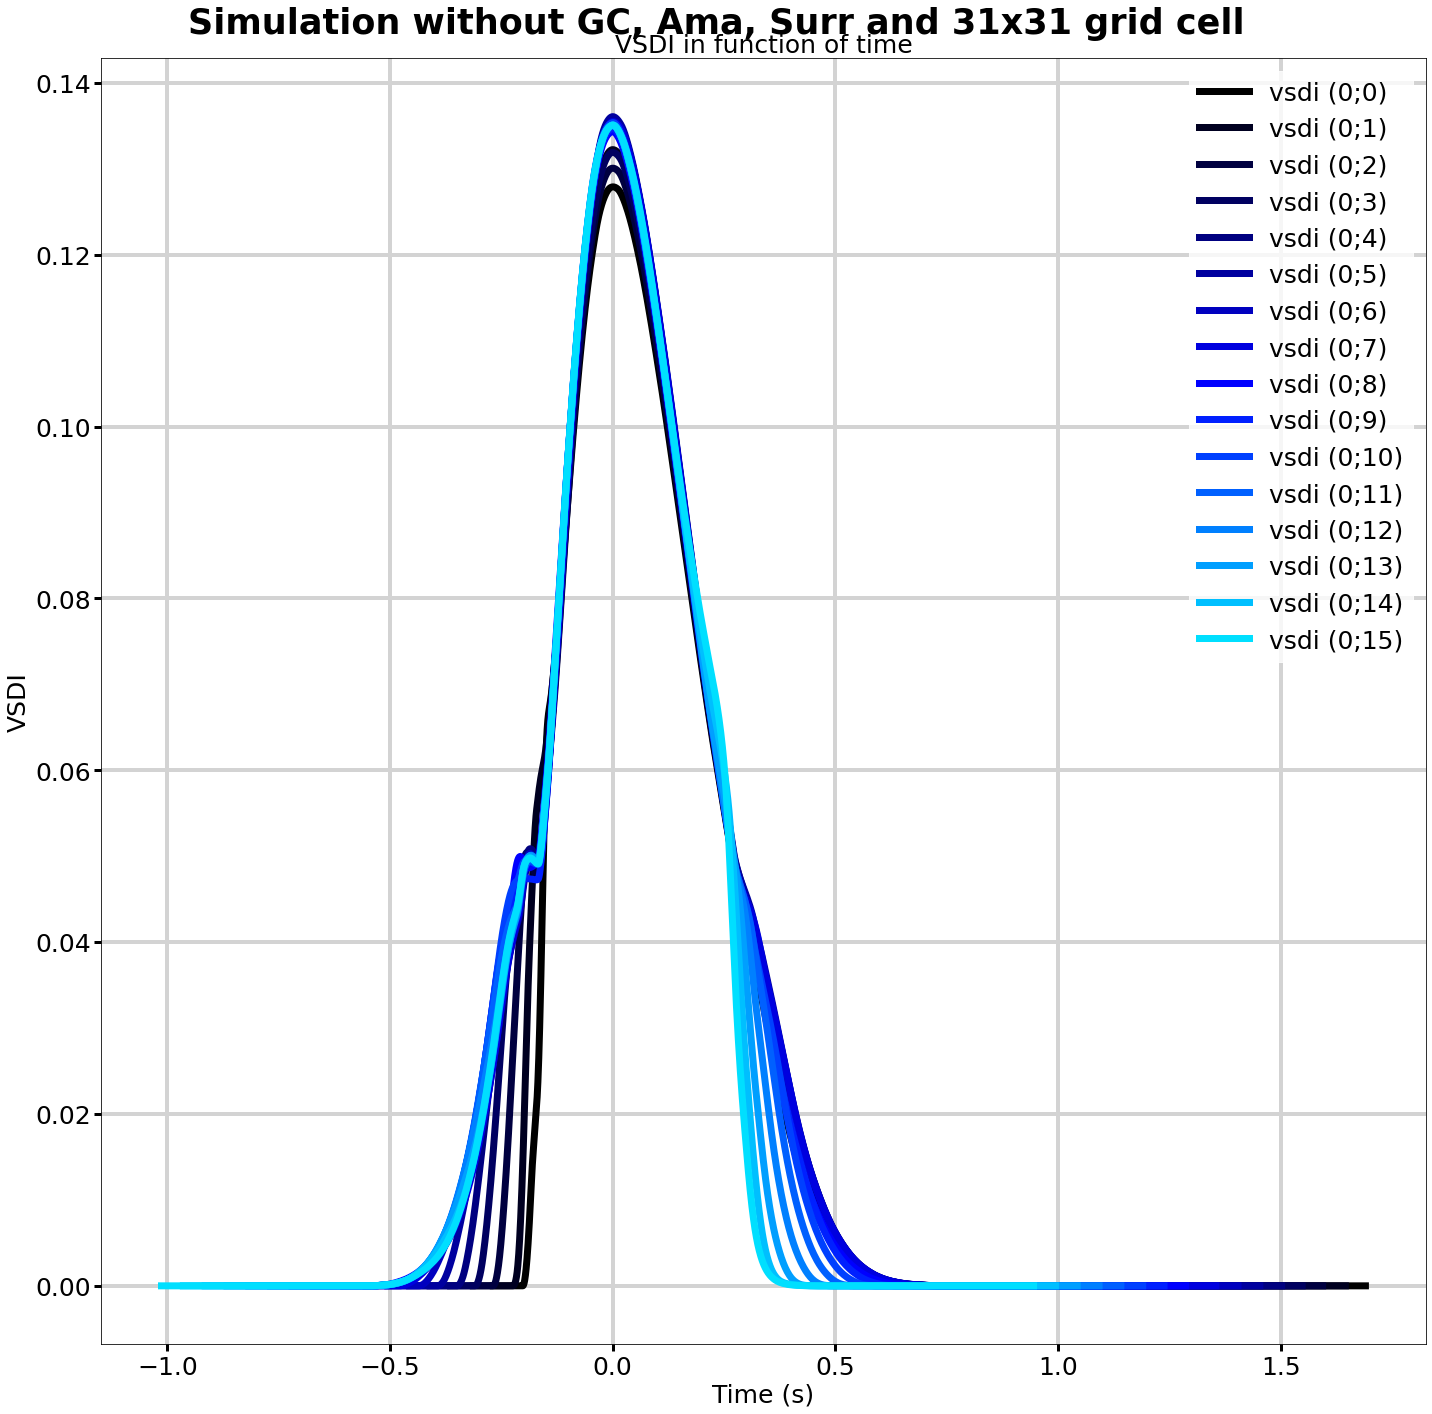

In [22]:
%matplotlib inline
importlib.reload(gdf)
importlib.reload(fg)

path = "/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_fastmovingBar/(current) corrections_retinocortical_branch/Cortex/all_cells_31x31_0.0244_noGC_noAma_noSurr_extdrive0,002_VC300_4f.csv"

df = gdf.GraphDF(path,0.0233,60,20,20)

df = df.crop(0.09)
df = df.isolate_dataframe_byoutputs("muVn")
num_exc = ",".join([str(i) for i in range(1249,1569,20)])
num_inh = ",".join([str(i) for i in range(1649,1969,20)])
exc = df.isolate_dataframe_columns_bynum(num_exc)
inh = df.isolate_dataframe_columns_bynum(num_inh)
# exc = df.isolate_dataframe_bytype("CorticalExcitatory")
# inh = df.isolate_dataframe_bytype("CorticalInhibitory")
exc.data = (abs((exc.data - exc.data.iloc[0].mean())) / abs(exc.data.iloc[0].mean()))
inh.data = (abs((inh.data - inh.data.iloc[0].mean())) / abs(inh.data.iloc[0].mean()))
# exc.data = ((exc.data - exc.data.iloc[0].mean()) / exc.data.iloc[0].mean())
# inh.data = ((inh.data - inh.data.iloc[0].mean()) / inh.data.iloc[0].mean())

col_exc_rename = {exc.data.columns[i]:f"CorticalColumn ({i}) vsdi" for i in range(exc.data.columns.shape[0])}
col_inh_rename = {inh.data.columns[i]:f"CorticalColumn ({i}) vsdi" for i in range(exc.data.columns.shape[0])}
exc.data = exc.data.rename(columns=col_exc_rename)
inh.data = inh.data.rename(columns=col_inh_rename)

vsdi = exc.copy()
vsdi.data=exc.data*0.8+inh.data*0.2
vsdi_c=vsdi.tmax_centering_df()

list_df = [vsdi_c]

params_fig = dict(wspace=0.2,hspace=0.4,height_ratios=[1,1],width_ratios=[1,1])

info_fig = {"title":"Simulation without GC, Ama, Surr and 31x31 grid cell","subtitles":["VSDI in function of time"],"xlabel":"Time (s)","ylabel":"VSDI",
"sharex":True,"sharey":False}

font_size = {"main_title":35, "subtitle":25, "xlabel":25, "ylabel":25, "g_xticklabel":25, "g_yticklabel":25, "legend":20}

params_plot = {"grid_color":"lightgray","grid_width":4,"ticklength":7,"tickwidth":3, 
               "plots_color":[[(0, 0, (i/(exc.data.shape[1]/2))) if i<exc.data.shape[1]/2 else (0, i/(exc.data.shape[1]/2) - 1, 1.0) for i in range(0,exc.data.shape[1],1)]]}

# params_plot = {"grid_color":"lightgray","grid_width":4,"ticklength":7,"tickwidth":3, 
#                "plots_color":[[(0, i/exc.data.shape[1], i/exc.data.shape[1]) for i in range(0,exc.data.shape[1]+1,1)]]}

f = gfg.graphFigure(list_df,1,1,20,20,dict_info_fig=info_fig, dict_font_size=font_size,dict_params_plot=params_plot)
f.set_figure_legend((1,), fontsize=25)
plt.tight_layout()
plt.savefig("/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_fastmovingBar/(current) corrections_retinocortical_branch/Cortex/VSDI_31x31.png")


-- Default values taken for figure parameters --


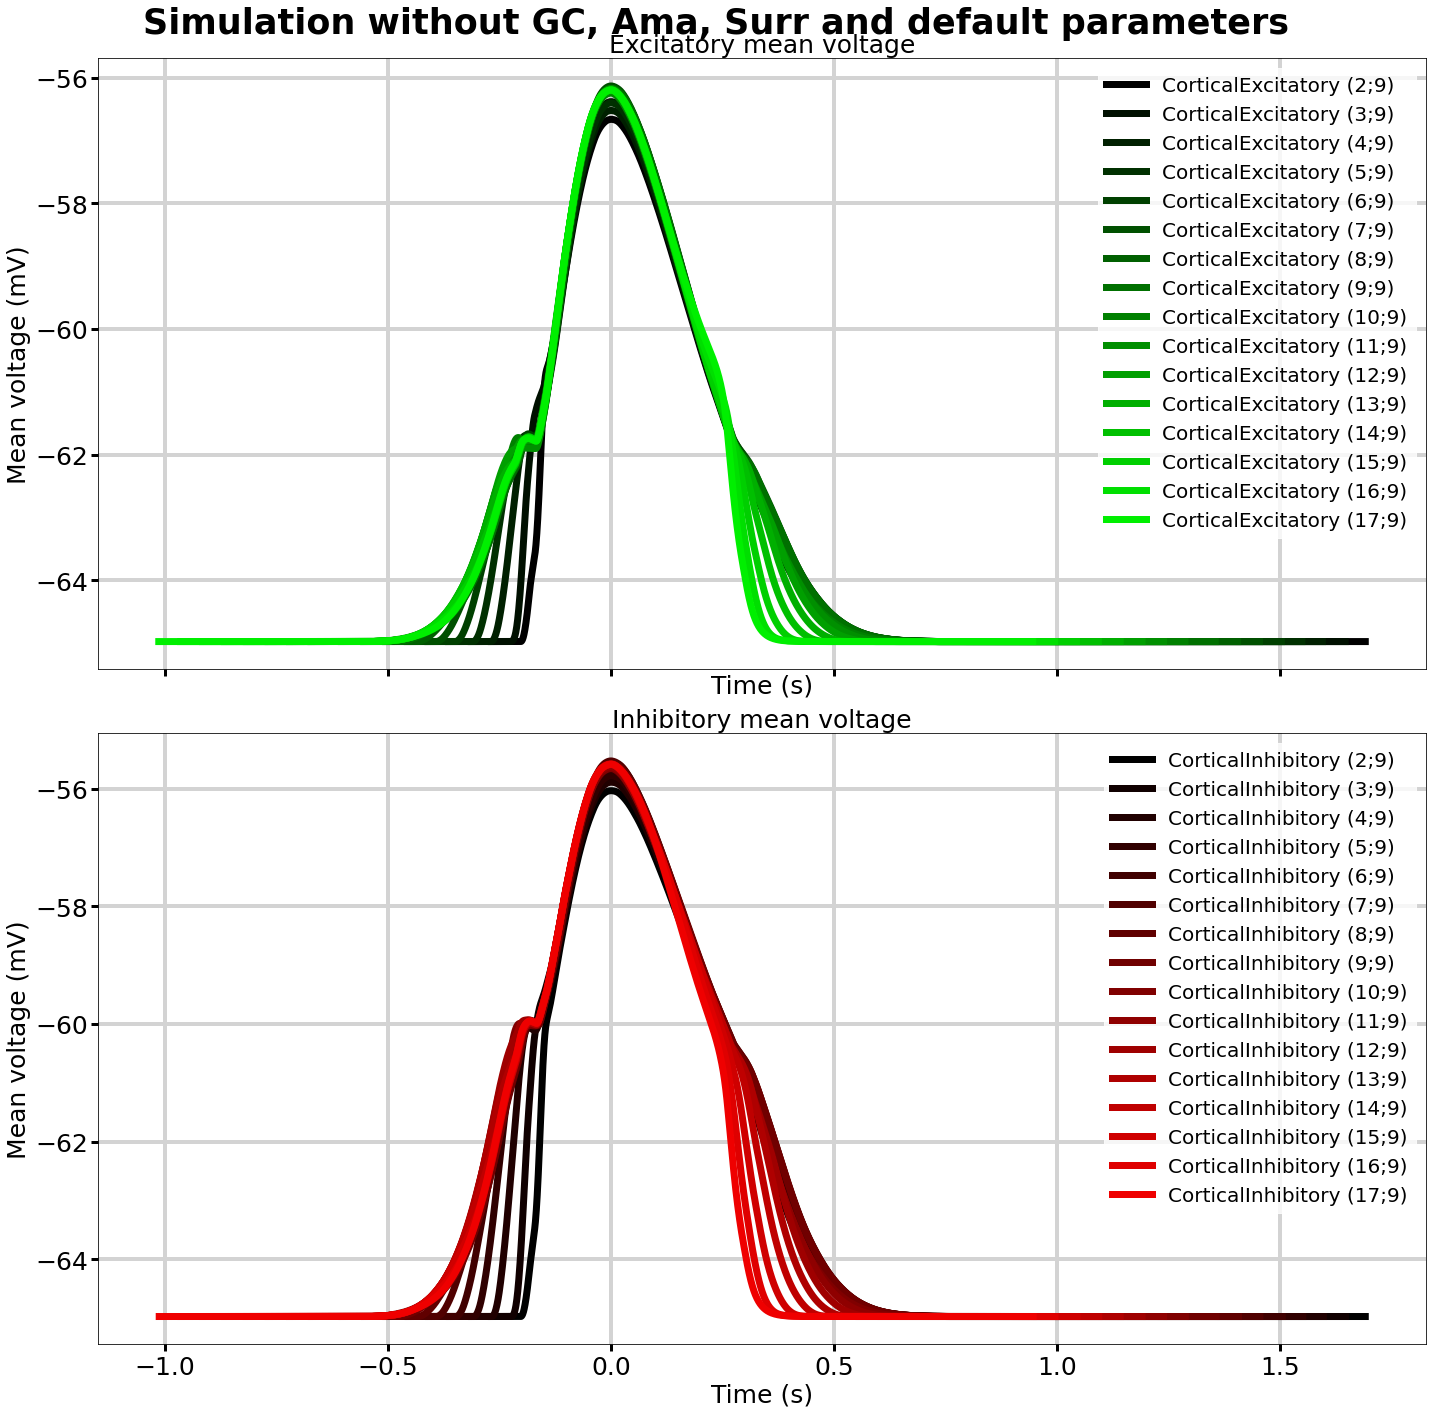

In [20]:
%matplotlib inline
importlib.reload(gdf)
importlib.reload(fg)

path = "/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_fastmovingBar/(current) corrections_retinocortical_branch/Cortex/all_cells_31x31_0.0244_noGC_noAma_noSurr_extdrive0,002_VC300_4f.csv"

df = gdf.GraphDF(path,0.0233,60,20,20)

df = df.crop(0.09)
df = df.isolate_dataframe_byoutputs("muVn")
num_exc = ",".join([str(i) for i in range(1249,1569,20)])
num_inh = ",".join([str(i) for i in range(1649,1969,20)])
exc = df.isolate_dataframe_columns_bynum(num_exc)
inh = df.isolate_dataframe_columns_bynum(num_inh)
inh_c=inh.tmax_centering_df()
exc_c=exc.tmax_centering_df()

list_df = [exc_c, inh_c]

params_fig = dict(wspace=0.2,hspace=0.4,height_ratios=[1,1],width_ratios=[1,1])

info_fig = {"title":"Simulation without GC, Ama, Surr and default parameters","subtitles":["Excitatory mean voltage","Inhibitory mean voltage"],"xlabel":"Time (s)","ylabel":["Mean voltage (mV)","Mean voltage (mV)"],
"sharex":True,"sharey":False}

font_size = {"main_title":35, "subtitle":25, "xlabel":25, "ylabel":25, "g_xticklabel":25, "g_yticklabel":25, "legend":20}

params_plot = {"grid_color":"lightgray","grid_width":4,"ticklength":7,"tickwidth":3, 
               "plots_color":[[(0, i/exc.data.shape[1], 0) for i in range(0,exc.data.shape[1],1)],[(i/exc.data.shape[1], 0, 0) for i in range(0,exc.data.shape[1],1)]]}


f = gfg.graphFigure(list_df,2,1,20,20,dict_info_fig=info_fig, dict_font_size=font_size,dict_params_plot=params_plot)
f.set_figure_legend((1,2), fontsize=20)
plt.tight_layout()
plt.savefig("/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_fastmovingBar/(current) corrections_retinocortical_branch/Cortex/muV_e_muV_i_31x31.png")


-- Default values taken for figure parameters --


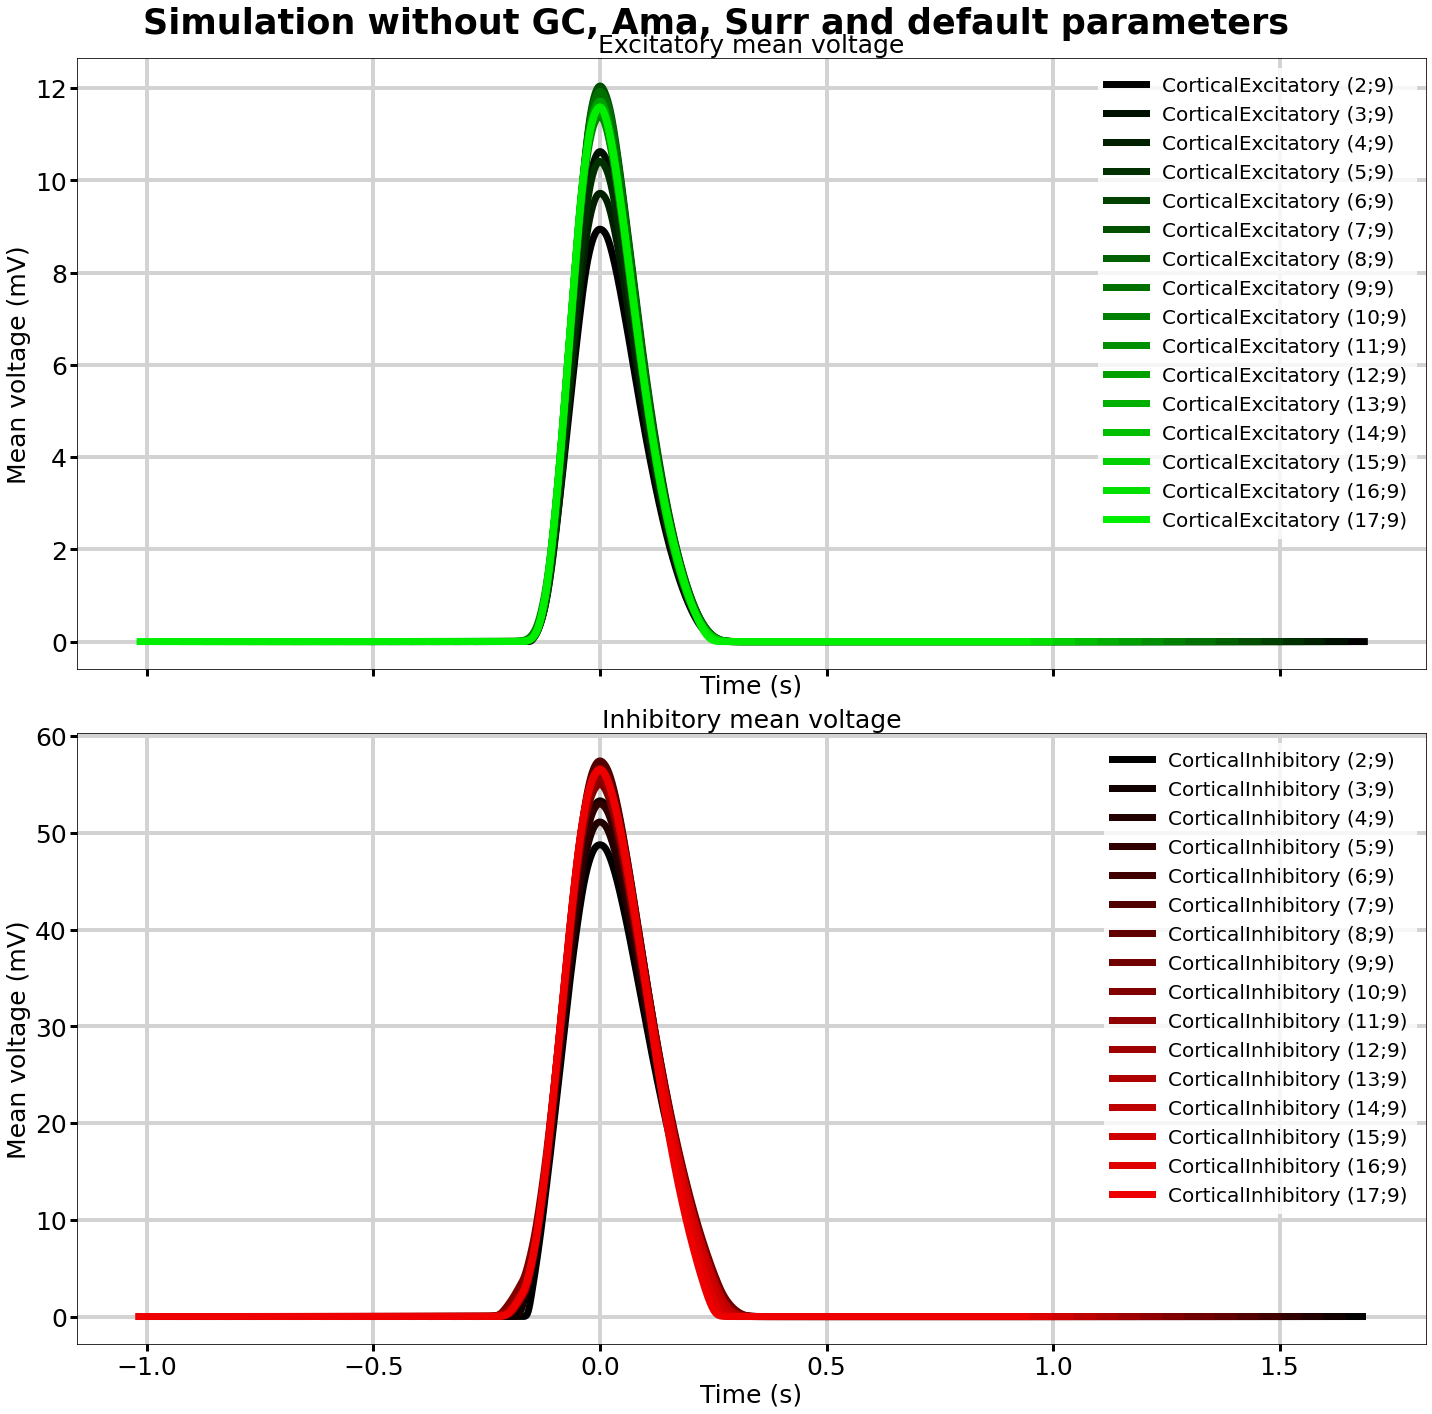

In [21]:
importlib.reload(gdf)
importlib.reload(fg)

path = "/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_fastmovingBar/(current) corrections_retinocortical_branch/Cortex/all_cells_31x31_0.0244_noGC_noAma_noSurr_extdrive0,002_VC300_4f.csv"

df = gdf.GraphDF(path,0.0233,60,20,20)

df = df.crop(0.09)
exc = df.isolate_dataframe_byoutputs("v_e")
inh = df.isolate_dataframe_byoutputs("v_i")
num_exc = ",".join([str(i) for i in range(1249,1569,20)])
num_inh = ",".join([str(i) for i in range(1649,1969,20)])
exc = exc.isolate_dataframe_columns_bynum(num_exc)
inh = inh.isolate_dataframe_columns_bynum(num_inh)
inh_c=inh.tmax_centering_df()
exc_c=exc.tmax_centering_df()

list_df = [exc_c, inh_c]

params_fig = dict(wspace=0.2,hspace=0.4,height_ratios=[1,1],width_ratios=[1,1])

info_fig = {"title":"Simulation without GC, Ama, Surr and default parameters","subtitles":["Excitatory mean voltage","Inhibitory mean voltage"],"xlabel":"Time (s)","ylabel":["Mean voltage (mV)","Mean voltage (mV)"],
"sharex":True,"sharey":False}

font_size = {"main_title":35, "subtitle":25, "xlabel":25, "ylabel":25, "g_xticklabel":25, "g_yticklabel":25, "legend":20}

params_plot = {"grid_color":"lightgray","grid_width":4,"ticklength":7,"tickwidth":3, 
               "plots_color":[[(0, i/exc.data.shape[1], 0) for i in range(0,exc.data.shape[1],1)],[(i/exc.data.shape[1], 0, 0) for i in range(0,exc.data.shape[1],1)]]}

f = gfg.graphFigure(list_df,2,1, 20,20,dict_info_fig=info_fig, dict_font_size=font_size,dict_params_plot=params_plot)
f.set_figure_legend((1,2), fontsize=20)
plt.tight_layout()
plt.savefig("/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_fastmovingBar/(current) corrections_retinocortical_branch/Cortex/nu_e_nu_i_31x31.png")